In [1]:
from joblib import load,dump
from imblearn.combine import SMOTEENN
from termcolor import colored
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocess/classification_data.joblib')

In [3]:
X_train.head()
y_train_pred_values = []
y_pred_values = []

In [4]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

In [5]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train data:\n')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)
    
    print('\n--------------------------------------\n')

    print('Test data:\n')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)

    return model,y_train_pred, y_pred

In [6]:
dtc = DecisionTreeClassifier(random_state=51)

In [7]:
dtc, y_train_pred, y_pred  = build_model(dtc, X_train, X_test, y_train, y_test)
y_train_pred_values.append(y_train_pred)
y_pred_values.append(y_pred)

Train data:

Confusion matrix: 
 [[1210    1]
 [   3  457]]
Accuracy score:  0.997606223818073
Precision score:  0.9978165938864629
Recall score:  0.9934782608695653
F1 score:  0.9956427015250545

--------------------------------------

Test data:

Confusion matrix: 
 [[337  73]
 [ 64  84]]
Accuracy score:  0.7544802867383512
Precision score:  0.535031847133758
Recall score:  0.5675675675675675
F1 score:  0.5508196721311476


In [8]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45],
    #'min_samples_split': [5, 10, 15, 20]
}

In [9]:
estimator = GridSearchCV(DecisionTreeClassifier(random_state=51), param_grid=params, cv=4)
estimator_bal = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid=params, cv=4)

In [10]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=51),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40,
                                       45]})

In [11]:
estimator.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [12]:
estimator.best_score_

0.7839747340883274

In [13]:
estimator , y_train_pred, y_pred = build_model(estimator, X_train, X_test, y_train, y_test)
y_train_pred_values.append(y_train_pred)
y_pred_values.append(y_pred)

Train data:

Confusion matrix: 
 [[1188   23]
 [ 276  184]]
Accuracy score:  0.8210652304009575
Precision score:  0.8888888888888888
Recall score:  0.4
F1 score:  0.5517241379310346

--------------------------------------

Test data:

Confusion matrix: 
 [[389  21]
 [102  46]]
Accuracy score:  0.7795698924731183
Precision score:  0.6865671641791045
Recall score:  0.3108108108108108
F1 score:  0.42790697674418604


In [14]:
estimator_bal.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40,
                                       45]})

In [15]:
estimator_bal.best_params_

{'criterion': 'entropy', 'max_depth': 40}

In [16]:
estimator_bal.best_score_

0.7600111298520991

In [17]:
estimator_bal , y_train_pred, y_pred = build_model(estimator_bal, X_train, X_test, y_train, y_test)
y_train_pred_values.append(y_train_pred)
y_pred_values.append(y_pred)

Train data:

Confusion matrix: 
 [[1207    4]
 [   0  460]]
Accuracy score:  0.997606223818073
Precision score:  0.9913793103448276
Recall score:  1.0
F1 score:  0.9956709956709957

--------------------------------------

Test data:

Confusion matrix: 
 [[339  71]
 [ 76  72]]
Accuracy score:  0.7365591397849462
Precision score:  0.5034965034965035
Recall score:  0.4864864864864865
F1 score:  0.49484536082474234


In [18]:
random_forest = RandomForestClassifier(random_state=55)

In [19]:
random_forest , y_train_pred, y_pred = build_model(random_forest, X_train, X_test, y_train, y_test)
y_train_pred_values.append(y_train_pred)
y_pred_values.append(y_pred)

Train data:

Confusion matrix: 
 [[1210    1]
 [   3  457]]
Accuracy score:  0.997606223818073
Precision score:  0.9978165938864629
Recall score:  0.9934782608695653
F1 score:  0.9956427015250545

--------------------------------------

Test data:

Confusion matrix: 
 [[379  31]
 [ 78  70]]
Accuracy score:  0.8046594982078853
Precision score:  0.693069306930693
Recall score:  0.47297297297297297
F1 score:  0.5622489959839357


In [20]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 200, 300]
}

estimator_rf = GridSearchCV(RandomForestClassifier(random_state=51), param_grid=params, cv=3)

In [21]:
estimator_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=51),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 200, 300]})

In [22]:
estimator_rf.best_params_

{'criterion': 'gini', 'n_estimators': 50}

In [23]:
estimator_rf.best_score_

0.8090963494913225

In [24]:
estimator_rf , y_train_pred, y_pred = build_model(estimator_rf, X_train, X_test, y_train, y_test)
y_train_pred_values.append(y_train_pred)
y_pred_values.append(y_pred)

Train data:

Confusion matrix: 
 [[1209    2]
 [   4  456]]
Accuracy score:  0.9964093357271095
Precision score:  0.9956331877729258
Recall score:  0.991304347826087
F1 score:  0.9934640522875816

--------------------------------------

Test data:

Confusion matrix: 
 [[378  32]
 [ 75  73]]
Accuracy score:  0.8082437275985663
Precision score:  0.6952380952380952
Recall score:  0.49324324324324326
F1 score:  0.5770750988142292


In [25]:
params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}
estimator_gb=GradientBoostingClassifier(random_state=55)

In [26]:
estimator_gb , y_train_pred, y_pred = build_model(estimator_gb, X_train, X_test, y_train, y_test)
y_train_pred_values.append(y_train_pred)
y_pred_values.append(y_pred)

Train data:

Confusion matrix: 
 [[1197   14]
 [ 169  291]]
Accuracy score:  0.8904847396768402
Precision score:  0.9540983606557377
Recall score:  0.6326086956521739
F1 score:  0.7607843137254902

--------------------------------------

Test data:

Confusion matrix: 
 [[379  31]
 [ 74  74]]
Accuracy score:  0.8118279569892473
Precision score:  0.7047619047619048
Recall score:  0.5
F1 score:  0.5849802371541502


In [27]:
estimator_gb = GridSearchCV(GradientBoostingClassifier(random_state=55), param_grid=params, cv=3)

In [28]:
estimator_gb.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=55),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [29]:
estimator_gb.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 6,
 'n_estimators': 100}

In [30]:
estimator_gb.best_score_

0.8114901256732495

In [31]:
estimator_gb , y_train_pred, y_pred = build_model(estimator_gb, X_train, X_test, y_train, y_test)
y_train_pred_values.append(y_train_pred)
y_pred_values.append(y_pred)

Train data:

Confusion matrix: 
 [[1209    2]
 [ 101  359]]
Accuracy score:  0.93836026331538
Precision score:  0.9944598337950139
Recall score:  0.7804347826086957
F1 score:  0.874543239951279

--------------------------------------

Test data:

Confusion matrix: 
 [[376  34]
 [ 73  75]]
Accuracy score:  0.8082437275985663
Precision score:  0.6880733944954128
Recall score:  0.5067567567567568
F1 score:  0.5836575875486382


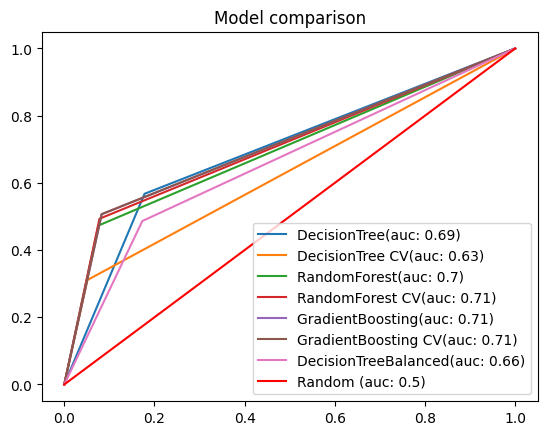

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dtc, estimator.best_estimator_, random_forest, estimator_rf.best_estimator_, estimator_gb, estimator_gb.best_estimator_, estimator_bal, estimator_bal.best_estimator_]
model_names = ['DecisionTree', 'DecisionTree CV',  'RandomForest', 'RandomForest CV','GradientBoosting','GradientBoosting CV','DecisionTreeBalanced']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()

In [37]:
accuracy_train = []
precision_train = []
recall_train = []
f1_train = []

accuracy_test = []
precision_test = []
recall_test = []
f1_test = []

for y_train_pred, y_pred in zip(y_train_pred_values, y_pred_values):
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    recall_train.append(recall_score(y_train, y_train_pred))
    f1_train.append(f1_score(y_train, y_train_pred))

    accuracy_test.append(accuracy_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))

accuracy_train

[0.997606223818073,
 0.8210652304009575,
 0.997606223818073,
 0.997606223818073,
 0.9964093357271095,
 0.8904847396768402,
 0.93836026331538]

In [38]:
dump((model_names,accuracy_train,precision_train,recall_train,f1_train,accuracy_test,precision_test,recall_test,f1_test), 'tree.joblib')

['tree.joblib']